In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

In [13]:
# Исходные данные
data = np.array([3, 7, 2, 9, 5, 6, 4, 8, 1, 10])

In [14]:
data.mean()

5.5

In [23]:
np.mean(np.random.choice(data, size=len(data), replace=True))

5.4

In [24]:
# Параметры бутстрапа
n_iterations = 1000
n_size = len(data)

# Генерация бутстрап-выборок и вычисление средних значений
means = []
for _ in range(n_iterations):
    sample = np.random.choice(data, size=n_size, replace=True)
    means.append(np.mean(sample))



In [25]:
means[:10]

[5.7, 6.1, 5.1, 5.7, 4.4, 5.8, 5.9, 6.6, 6.4, 4.4]

In [26]:
# Оценка среднего и доверительных интервалов
bootstrap_mean = np.mean(means)
lower_bound = np.percentile(means, 2.5)
upper_bound = np.percentile(means, 97.5)

print(f"Бутстрап-оценка среднего: {bootstrap_mean}")
print(f"95% доверительный интервал: ({lower_bound}, {upper_bound})")


Бутстрап-оценка среднего: 5.4811
95% доверительный интервал: (3.6, 7.2)


## С помощью bootstrap из stats

**Аргумент (data,):** Данные передаются в функцию в виде кортежа, так как функция bootstrap ожидает кортеж массивов. В нашем случае это кортеж, содержащий единственный массив data.


**Аргумент np.mean:** Указываем функцию, которая будет применяться к каждой бутстрап-выборке. В данном случае это функция np.mean, которая вычисляет среднее значение выборки.


**Аргумент n_resamples**=n_iterations: Задаем количество бутстрап-выборок, которые будут созданы. Это соответствует количеству итераций в бутстрап-процессе. В нашем случае это 1000 итераций.


**Аргумент confidence_level**=0.95: Указываем уровень доверия для вычисления доверительного интервала. В данном случае это 95%, что означает, что мы хотим получить 95% доверительный интервал.


In [30]:
# Параметры бутстрапа
n_iterations = 1000

# Бутстрап-оценка среднего и доверительных интервалов
res = bootstrap((data,), np.mean, n_resamples=n_iterations, confidence_level=0.95)

bootstrap_mean = np.mean(res.bootstrap_distribution)
lower_bound, upper_bound = res.confidence_interval

print(f"Бутстрап-оценка среднего: {bootstrap_mean}")
print(f"95% доверительный интервал: ({lower_bound}, {upper_bound})")


Бутстрап-оценка среднего: 5.463100000000001
95% доверительный интервал: (3.8, 7.2452847374913745)


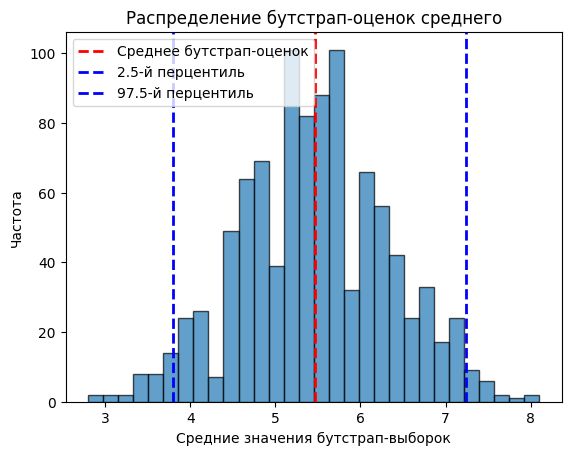

In [31]:
# Визуализация распределения бутстрап-оценок среднего
plt.hist(res.bootstrap_distribution, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(bootstrap_mean, color='red', linestyle='dashed', linewidth=2, label='Среднее бутстрап-оценок')
plt.axvline(lower_bound, color='blue', linestyle='dashed', linewidth=2, label='2.5-й перцентиль')
plt.axvline(upper_bound, color='blue', linestyle='dashed', linewidth=2, label='97.5-й перцентиль')
plt.xlabel('Средние значения бутстрап-выборок')
plt.ylabel('Частота')
plt.title('Распределение бутстрап-оценок среднего')
plt.legend()
plt.show()